# Understanding Surface Properties (3): Surface Roughness

## Objectives

1. Understand how to quantify surface roughness
2. Understand variability of surface roughness


<div class="alert alert-info">

**Tips:** 

1. [Eddy Covariance](https://blm.readthedocs.io/en/latest/EddyCovariance.html) observations allow several important parameters to be determined:
   -  **Zero plane displacement length** $d$ can be calculated based on vegetation height (think about changes in [LAI](https://blm.readthedocs.io/en/latest/LAI.html) and porosity). If there is a profile of anemometers (e.g. as at the [Observatory](https://blm.readthedocs.io/en/latest/URAO.html)) then this can be calculated using that.
   -  **Roughness length** $z_0$ can be calculated from the EC data ([EddyCovariance](../EddyCovariance.rst)) by rearranging the logarithmic law from the neutral wind profile [WindProfile](https://blm.readthedocs.io/en/latest/WindProfile.html)).
2.  Do these vary with season? Wind Direction? Create a graph to analyse the data (think about wind directions).
3.  How do these values compare to the literature?
1.  Calculate the **aerodynamic resistance** $r_a$.
2.  For scientific background see [Roughness](https://blm.readthedocs.io/en/latest/Parameters.html#roughness-length-z-0-and-displacement-height-d) and [Reading List](https://blm.readthedocs.io/en/latest/ReadingList.html)


</div>


## Tasks

### load necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

### loading data

In [2]:
group_number = 10
path_dir = Path.cwd() / 'data' / f'{group_number}'
# examine available files in your folder
list(path_dir.glob('*gz'))

[PosixPath('/Users/sunt05/Dropbox/6.Repos/BLM-task3/data/10/US-Oho_clean.csv.gz'),
 PosixPath('/Users/sunt05/Dropbox/6.Repos/BLM-task3/data/10/CA-TPD_clean.csv.gz')]

In [3]:
# specify the site name
name_of_site = 'CA-TPD'

In [4]:
# load measurement heights
df_zmeas = pd.read_csv('data/measurement_height.csv', index_col=0)
df_zmeas.loc[name_of_site].iloc[:]

,Variable,Start_Date,Height,Instrument_Model,Instrument_Model2,Comment,BASE_Version
Site_ID,,,,,,,
CA-TPD,CO2_1_1_1,2012.0,35.70,GA_CP-LI-COR LI-7200,NaN,LI-7200 IRGA),02-May
CA-TPD,CO2_1_2_1,2012.0,16.00,GA_SR-LI-COR LI-820,NaN,LI820_CO2_Cnpy_16m (ppm); CO2,02-May
CA-TPD,FC,2012.0,35.70,GA_CP-LI-COR LI-7200,NaN,NaN,02-May
CA-TPD,FH2O,2012.0,NaN,NaN,NaN,NaN,02-May
CA-TPD,LE,2012.0,35.70,GA_CP-LI-COR LI-7200,NaN,NaN,02-May
CA-TPD,PPFD_IN_PI_F_1_1_1,2012.0,35.13,RAD-PAR Quantum,NaN,NaN,02-May
CA-TPD,P_CUM,2012.0,2.00,NaN,NaN,NaN,02-May
CA-TPD,PA_PI_F,2012.0,2.00,NaN,NaN,NaN,02-May
CA-TPD,G_1_1_1,2012.0,0.00,SOIL_H-Plate,NaN,NaN,02-May


from the table above, we know the measurement height for wind speed `WS` is `36.6 m`.

We will use the value in the following calculation.

In [5]:
# write down measurement height of wind speed
z_meas = 36.6

In [6]:
# load dataset
site_file = name_of_site + '_clean.csv.gz'
path_data = path_dir / site_file
df_data = pd.read_csv(path_data, index_col='time', parse_dates=['time'])
df_data.head()

,WS,RH,TA,PA,WD,P,SWIN,LWIN,SWOUT,LWOUT,NETRAD,H,LE,USTAR,ZL
time,,,,,,,,,,,,,,,
2012-01-01 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.133,12.683,1.170,NaN
2012-01-01 11:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-71.325,28.933,1.188,NaN
2012-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-64.607,29.349,1.188,NaN
2012-01-01 12:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-94.362,36.909,1.295,NaN
2012-01-01 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-74.555,51.049,1.212,NaN


### stability correction

You need to calculate Obukhov Stavility parameter as following:
$$
L=-\frac{u_{*}^{3}}{k \frac{g}{T} \frac{Q_{H}}{\rho c_{p}}}
$$

$$
\text{Obukhov stability parameter }=\frac{z-d}{L}
$$

where $u_*$ is friction velocity; $g$ is gravity; $T$ is air temperature; $k$ is von Kármán’s ‘constant’ (0.4); $Q_H$ is turbulent sensible heat flux; $\rho$ is air density; $z$ is measurement height; and $d$ is zero desplacement height



We use different functions for this. The functions are already implemented. You can use these functions in the future for different part of the model. Here some example how to use them.

In [7]:
from utility import cal_vap_sat, cal_dens_dry, cal_dens_vap, cal_cpa, cal_dens_air, cal_Lob

In [8]:
# saturation vapour pressure [hPa]
cal_vap_sat(0.0003, 1013)

6.118926455724389

In [9]:
# density of dry air [kg m-3]
cal_dens_dry(98, 23, 1013)

1.1591455092830807

In [10]:
# density of vapour [kg m-3]
cal_dens_vap(98, 23, 1013)

0.020167600169459326

In [11]:
# specific heat capacity of air mass [J kg-1 K-1]
cal_cpa(23, 30, 1013)

1010.1394406405146

In [12]:
# air density [kg m-3]
cal_dens_air(1013, 32)

1.1564283022625206

In [13]:
# Obukhov length
cal_Lob(500, 0.0001, 23, 90, 1020)

-0.00018481221694860222

Now we can calculate Obukhov length ($L$). Let's integrate all together:

Here you need to specify the height of the vegetation `h_sfc` . You can find this from the paper related to your site. Note that the height should be smaller than the measurement height

In [14]:
# select valid values
df_val = df_data.loc[:, ['H', 'USTAR', 'TA', 'RH', 'PA', 'WS']].dropna()

# calculate Obukhov length
ser_Lob = df_val.apply(
    lambda ser: cal_Lob(ser.H, ser.USTAR, ser.TA, ser.RH, ser.PA * 10), axis=1)

# zero-plane displacement: estimated using rule f thumb `d=0.7*h_sfc`
h_sfc = 10
z_d = 0.7 * h_sfc

if z_d >= z_meas:
    print(
        'vegetation height is greater than measuring height. Please fix this before continuing'
    )

# calculate stability scale
ser_zL = (z_meas - z_d) / ser_Lob

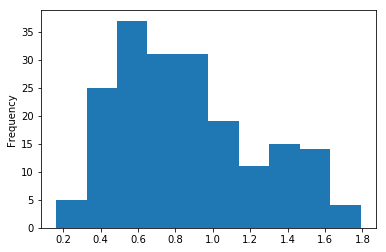

In [15]:
# determine periods under quasi-neutral conditions
limit_neutral = 0.01
ind_neutral = ser_zL.between(-limit_neutral, limit_neutral)
df_val.loc[ind_neutral, 'USTAR'].plot.hist()

### calculate roughness length $z_0$ and zero plane displacement $d$

#### theoretical basis

We will employ the followng equation in our calculations:
$$
\bar{u}(z)=\frac{u_{*}}{k} \ln \left[\frac{(z-d)}{z_{0}}\right]
$$
where $\bar{u}(z)$ is the measured wind speed at a height $z$, 
$u_{*}$ the friction velocity, 
$d$ the zero-plane displacement, 
$k$ the von Karman’s constant (a value of 0.4 used in the following calculation).

#### calculation

We will use `scipy.optimize.curve_fit` to determine the parameters $z_0$ and $d$ in the model above.

In [16]:
from scipy.optimize import curve_fit

To use `curve_fit`, we need to define a function repensenting the model above:

In [17]:
def func_uz(ustar, z0):
    z = z_meas
    d = 0.7 * h_sfc
    k = 0.4
    uz = ustar / k * np.log((z - d) / z0)
    return uz

In [18]:
# choose the necessary variables
df_sel = df_val.loc[ind_neutral, ['WS', 'USTAR']].dropna()

In [19]:
# set up input data for curve fitting
ser_ustar = df_sel.USTAR
ser_ws = df_sel.WS
# use `curve_fit` to get parameters of interest
z0_fit, _ = curve_fit(func_uz, ser_ustar, ser_ws, bounds=[(0), (np.inf)])

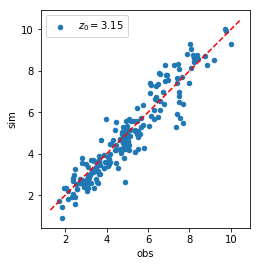

In [20]:
# examine the results
res_fit = func_uz(ser_ustar, z0_fit).rename('sim')
res_obs = ser_ws.copy().rename('obs')
df_comp = pd.concat([res_obs, res_fit], axis=1)
ax = df_comp.plot.scatter(x='obs', y='sim', label=f'$z_0=${z0_fit[0]:.2f}')
lim = ax.get_xlim()
ax.plot(lim, lim, color='r', linestyle='--')
ax.set_aspect('equal')

#### Calculate aerodynamic resistance $r_a$

##### write down the equation used for this calculation

equation with explanations of symbol:
$$
equation\ here
$$

##### calculation

In [21]:
# calculation code

#### examination of variability

In [22]:
# calculation code